In [1]:
import numpy as np
import pandas as pd
from datascience import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [7]:
#Run this cell to load the special plotting functions
def quant_data_bar(tbl, column_label, num_bins=10, x_min=None, x_max=None):
    """
    Plots a bar chart of quantitative data for a given input table and desired column.
    This function will bin the values of column_label and plot the counts of each bin on the
    y-axis.
    
    Parameters:
        tbl: A Table containing the data you would like to plot
        column_label: The name of the column to be binned and plotted on the x-axis
        num_bins (optional): The number of equal-width bins. By default, this function
                                uses 10 bins.
        x_min (optional): Desired lowest value on the horizontal axis; default is the 
                            minimum of the data in the specified column
        x_max (optional): Desired highest value on the horizontal axis; default is the 
                            maximum of the data in the specified column
    """
    tbl.hist(column_label, normed=False, bins=num_bins)
    ax = plt.gca()
    ax.set_xlim(left=x_min) if x_min else None
    ax.set_xlim(right=x_max) if x_max else None

# Project 2: Soccer

## The Data Science Life Cycle - Table of Contents

<a href='#section 0'>Background Knowledge</a>

<a href='#subsection 1a'>Formulating a question or problem</a> 

<a href='#subsection 1b'>Acquiring and preparing data</a>

<a href='#subsection 1c'>Conducting exploratory data analysis</a>

<a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


Nothing frustrates both soccer fans and players as much as being [red-carded](https://en.wikipedia.org/wiki/Penalty_card#Red_card). In soccer, receiving a red card from the referee means that the player awarded the red card is expelled from the game, and consequently his team must play with one fewer player for the remainder of the game.

Due to the inherently subjective nature of referees' judgments, questions involving the fairness of red card decisions crop up frequently, especially when soccer players with darker complexions are red-carded.

For the remainder of this project, we will explore a dataset on red-cards and skin color and attempt to understand how different approachs to analysis can lead to different conclusions to the general question: "Are referees more likely to give red cards to darker-skinned players?"


 <img src="images/redcard.jpg" width = 700/>

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a question or problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and that will avoid misleading results. 

<div class="alert alert-info">
<b>Question:</b> Recall the questions about red cards and skin color that you encountered in your initial investigation last week. Now, think about questions you still have and want to answer. What kind of data is needed to address these questions?
   </div>
   

**Your questions:** *here*

**Data you would need:** *here*

## Acquiring and cleaning data <a id='subsection 1b'></a>
 
In this notebook, you'll be working with a dataset containing entries for many European soccer players, containing variables such as club, position, games, and skin complexion.

Important to note about this dataset is that it was generated as the result of an [observational study](https://en.wikipedia.org/wiki/Observational_study), rather than a [randomized controlled experiment](https://en.wikipedia.org/wiki/Randomized_controlled_trial). In an observational study, entities' independent variables (such as race, height, zip code) are observed, rather than controlled as in the randomized controlled experiment. Though data scientists often prefer the control and accuracy of controlled experiments, often performing one is either too costly or poses ethical questions (e.g., testing trial drugs and placebo treatments on cancer patients at random). Though our dataset was generated organically--in the real world rather than in a laboratory--it is statistically more challenging to prove causation among variables for these kinds of observational studies.


Please read this summary of the [dataset's description](https://osf.io/9yh4x/) to familiarize yourself with the context of the data:

>*...we obtained data and profile photos from all soccer players (N = 2053) playing in the first male divisions of England, Germany, France and Spain in the 2012-2013 season and all referees (N = 3147) that these players played under in their professional career. We created a dataset of player dyads including the number of matches players and referees encountered each other and our dependent variable, the number of red cards given to a player by a particular referee throughout all matches the two encountered each other.*

>*...implicit bias scores for each referee country were calculated using a race implicit association test (IAT), with higher values corresponding to faster white | good, black | bad associations. Explicit bias scores for each referee country were calculated using a racial thermometer task, with higher values corresponding to greater feelings of warmth toward whites versus blacks.*

In [9]:
# Run this cell to load the data

data = pd.read_csv("data/CrowdstormingDataJuly1st.csv").dropna()
data = Table.from_df(data)

Here are some of the important fields in our data set that we will focus on:

|Variable Name   | Description |
|--------------|------------|
|`player` | player's name |
|`club` | player's soccer club (team) |
|`leagueCountry`| country of player club (England, Germany, France, and Spain) |
|`height` | player height (in cm) |
|`games`| number of games in the player-referee dyad |
|`position` | detailed player position |
|`goals`| goals scored by a player in the player-referee dyad |
|`yellowCards`| number of yellow cards player received from referee |
|`yellowReds`| number of yellow-red cards player received from referee |
|`redCards`| number of red cards player received from referee |
|`rater1`| skin rating of photo by rater 1 (5-point scale ranging from very light skin to very dark skin |
|`rater2`| skin rating of photo by rater 2 (5-point scale ranging from very light skin to very dark skin |
|`meanIAT`|  mean implicit bias score (using the race IAT) for referee country, higher values correspond to faster white good, black bad associations |
|`meanExp`| mean explicit bias score (using a racial thermometer task) for referee country, higher values correspond to greater feelings of warmth toward whites versus blacks |

As you can see on the table above, two of the variables we will be exploring is the ratings on skin tone (1-5) measured by two raters, Lisa and Shareef. For context, we have added a series of images that were given to them so that you can better understand their perspective on skin tones. Keep in mind that this might affect our hypothesis and drive our conclusions. 

Note: On the following images, the only two were the rating for the two raters coincide is image #3 on the top and image #6 on the bottom. 

<img src="images/L1S1.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L1S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L2S2.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L3S4.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L4S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/L5S5.jpg" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

In [10]:
# Run this cell show the first ten rows of the data
data.show(10)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193,80,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180,70,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177,74,Right Fullback,2,2,0,0,0,1,0,0,59786.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181,74,Left Winger,1,1,0,0,0,0,0,0,23229.jpg,0.5,0.5,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522
benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187,80,Center Back,1,1,0,0,0,0,0,0,59387.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522


Let's remove the columns we are not going to be working with.

In [11]:
cols_to_drop = ["birthday", "victories", "ties", "defeats", "goals",
                "photoID", "Alpha_3", "nIAT", "nExp"]

data = data.drop(cols_to_drop)

Let's reload the table to make sure we got rid of all of our undesired columns.

In [12]:
data.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522


# Conducting EDA: Club Teams

### Separating the Data

<div class="alert alert-info">
        <b>Question:</b> Create three new tables called <code>spain</code>,  <code>england</code>, and <code>france</code> which only have rows for the corresponding country league. Use the original table's <code>leagueCountry</code> column to obtain the genre.
</div>

In [15]:
#KEY

spain = data.where("leagueCountry", are.equal_to("Spain"))
spain.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,177,72,Attacking Midfielder,1,0,0,0,0.25,0.5,1,1,0.326391,0.000564112,0.396,0.00269649
antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,177,74,Right Fullback,2,1,0,0,0,0,4,4,0.325185,0.00329681,0.538462,0.0137522
ivan-obradovic,Ivan Obradović,Real Zaragoza,Spain,181,74,Left Fullback,1,1,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
mesut-oezil,Mesut Özil,Real Madrid,Spain,183,76,Attacking Midfielder,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
patrick-ebert,Patrick Ebert,Real Valladolid,Spain,172,68,Left Midfielder,1,0,0,0,0,0,4,4,0.325185,0.00329681,0.538462,0.0137522


In [16]:
#KEY

england = data.where("leagueCountry", are.equal_to("England"))
england.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp
aaron-hughes,Aaron Hughes,Fulham FC,England,182,71,Center Back,1,0,0,0,0.25,0,4,4,0.325185,0.00329681,0.538462,0.0137522
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187,80,Left Fullback,1,0,0,0,0,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
alexander-tettey,Alexander Tettey,Norwich City,England,180,68,Defensive Midfielder,1,0,0,0,1,1,4,4,0.325185,0.00329681,0.538462,0.0137522
anders-lindegaard,Anders Lindegaard,Manchester United,England,193,80,Goalkeeper,1,0,0,0,0.25,0.25,4,4,0.325185,0.00329681,0.538462,0.0137522
ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,181,74,Left Winger,1,0,0,0,0.5,0.5,4,4,0.325185,0.00329681,0.538462,0.0137522


In [17]:
#KEY

france = data.where("leagueCountry", are.equal_to("France"))
france.show(5)

playerShort,player,club,leagueCountry,height,weight,position,games,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,seIAT,meanExp,seExp
john-utaka,John Utaka,Montpellier HSC,France,179,82,Right Winger,1,1,0,0,0.75,0.75,2,2,0.203375,0.0108749,-0.204082,0.0615044
carl-medjani,Carl Medjani,AC Ajaccio,France,184,84,Center Back,1,0,0,0,0.5,0.5,6,6,0.322177,0.00334416,0.117647,0.0137214
ryad-boudebouz,Ryad Boudebouz,FC Sochaux,France,172,59,Right Midfielder,1,0,0,0,0.25,0.25,6,6,0.322177,0.00334416,0.117647,0.0137214
abdoulaye-diallo_2,Abdoulaye Diallo,Stade Rennes,France,189,80,Goalkeeper,1,0,0,0,0.75,1,7,7,0.334684,0.000150885,0.336101,0.000585966
alexandre-alphonse,Alexandre Alphonse,Stade Brest,France,176,70,Right Winger,1,0,0,0,0.5,0.75,7,7,0.334684,0.000150885,0.336101,0.000585966


### Part One: Average Rating between Clubs

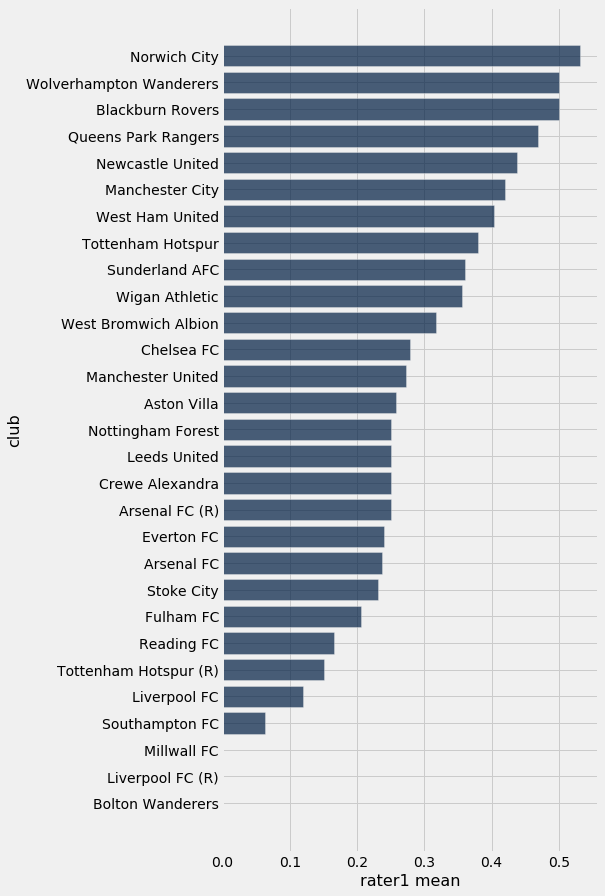

In [24]:
#KEY

england.group("club", np.mean).sort("rater1 mean", descending=True).barh("club", "rater1 mean")

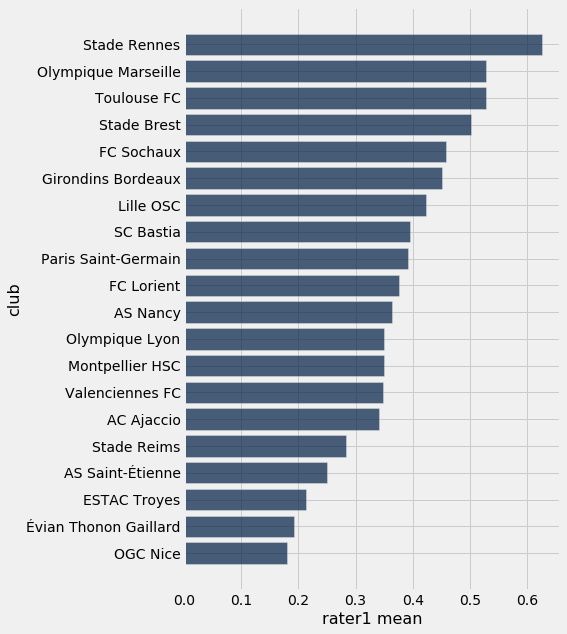

In [25]:
#KEY

france.group("club", np.mean).sort("rater1 mean", descending=True).barh("club", "rater1 mean")

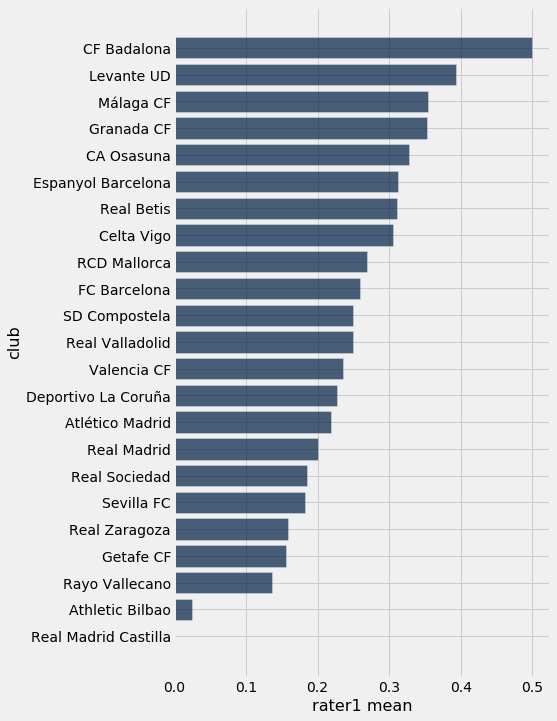

In [26]:
#KEY

spain.group("club", np.mean).sort("rater1 mean", descending=True).barh("club", "rater1 mean")

### Part 2: Bar plots

Observe below how we're able to use a pivot table to make an insightful series of bar plots on the number of red cards awarded by referees officiating in different leagues across Europe. The number to the left of the plots' y axes represents the number of red cards awarded in those kinds of games. The labels of the plots' y axes is the number of games in that particular referee/league combination for the given number of red cards.

Run the following cell to load a new table. The values represent the number of games for each **league, number of red cards** combination:

In [29]:
france_agg = france.pivot("redCards", "club")
france_agg

club,0,1,2
AC Ajaccio,410,9,0
AS Nancy,253,8,0
AS Saint-Étienne,655,8,0
ESTAC Troyes,257,2,0
FC Lorient,504,10,1
FC Sochaux,582,7,0
Girondins Bordeaux,1406,23,1
Lille OSC,1495,14,0
Montpellier HSC,1201,36,2
OGC Nice,380,10,0


And now run the below cell to plot a bar chart for each individual league

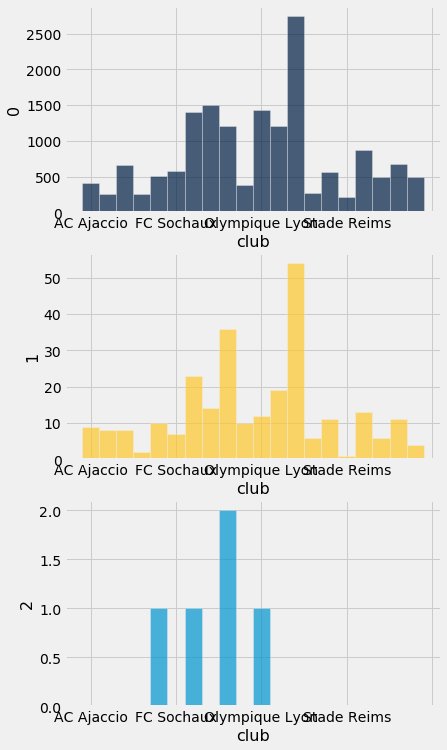

In [30]:
france_agg.bar("club", overlay=False)

<div class="alert alert-info">
<b>Question:</b> 
Interpret what you see. Which countries (if any) do you hypothesis tend to award more/less red cards? Feel free to do some research on sport culture in each of these countries.
   </div>

*Insert Answer Here*

# Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

....

<div class="alert alert-info"> 
<b>Question:</b> ...

</div>

*INSERT ANSWER HERE*

<div class="alert alert-info"> 
<b>Question:</b> ...
</div>

*INSERT ANSWER HERE*

<div class="alert alert-info"> 
<b>Question:</b> ...
</div>

*INSERT ANSWER HERE*

<div class="alert alert-success" role="alert">
  <h2 class="alert-heading">Well done!</h2>
    <p>In this report, you ...
    <hr>
    <p> Notebook created for Berkeley Unboxing Data Science 2021 
    <p> Adapted from Project 2: Soccer by Will Furtado with the support of Ani Adhikari, Deb Nolan, and Carlos Ortiz
</div>